# Importing Libraries

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Loading the CSV file

In [2]:
#importing the file from github
Train=pd.read_csv(r"C:\Users\Hanish\Desktop\prop\rest.csv")
Train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
Train.shape

(12690, 9)

In [4]:
Train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [5]:
Train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [6]:
#checking unique value for every column
Train.apply(lambda x: len(x.unique()))

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               360
LOCALITY          1417
RATING              33
VOTES             1848
COST                86
dtype: int64

# EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

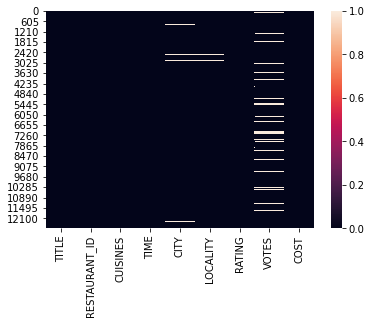

In [8]:
#let's check the null value
sns.heatmap(Train.isnull())

In [9]:
Train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [10]:
Train.loc[~Train['RATING'].astype(str).str.isdigit(), 'RATING'].tolist()

['3.6',
 '4.2',
 '3.8',
 '4.1',
 '3.8',
 '4.0',
 '4.1',
 '4.3',
 '3.9',
 '3.3',
 '4.1',
 '4.0',
 '3.4',
 '-',
 '4.0',
 '4.5',
 '3.6',
 '3.5',
 '3.6',
 '4.1',
 '4.2',
 '4.0',
 '4.0',
 '3.9',
 '4.2',
 '3.8',
 '3.4',
 '4.1',
 '4.3',
 '4.2',
 '3.5',
 '4.0',
 '4.0',
 '4.4',
 '2.7',
 '3.3',
 '3.7',
 '4.3',
 '4.0',
 '3.4',
 '3.3',
 '3.8',
 '3.3',
 '4.0',
 '4.2',
 '4.1',
 '4.0',
 '3.9',
 '4.7',
 '4.3',
 '3.3',
 '4.0',
 '3.9',
 '3.7',
 '3.7',
 '3.8',
 '3.3',
 '3.6',
 '4.0',
 '3.9',
 '3.6',
 '3.6',
 'NEW',
 '4.0',
 '3.7',
 '4.3',
 '3.4',
 '4.3',
 '3.3',
 'NEW',
 '4.0',
 '3.6',
 '4.3',
 '4.0',
 '4.3',
 '3.5',
 '3.1',
 '3.4',
 '3.9',
 '3.8',
 '4.0',
 '3.8',
 '4.0',
 '4.2',
 '4.0',
 '-',
 '3.8',
 '3.1',
 '3.7',
 '4.1',
 '4.1',
 '4.0',
 '3.9',
 '3.4',
 '3.9',
 '4.2',
 '3.8',
 '3.9',
 '3.8',
 '3.7',
 '3.8',
 '3.4',
 '3.5',
 '4.0',
 '2.7',
 '4.3',
 '4.2',
 '3.4',
 '4.0',
 '4.1',
 '3.7',
 'NEW',
 '3.7',
 '3.6',
 '4.1',
 '4.0',
 '3.4',
 'NEW',
 '4.4',
 '3.8',
 'NEW',
 '3.6',
 '3.6',
 '4.2',
 '3.3',
 '4.

In [11]:
Train.RATING=Train.RATING.str.replace('[-,NEW]','0') 



In [12]:
Train['RATING'] = Train['RATING'].astype(float)

In [13]:
Train.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES             object
COST               int64
dtype: object

In [14]:

Train['RATING'].fillna(0,inplace = True)

In [15]:

median_Rating = Train['RATING'].median(skipna=True)
print(median_Rating)

3.8


In [16]:
Train['RATING'] = Train['RATING'].replace(0,3.8)

In [17]:
Train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              0
VOTES            1204
COST                0
dtype: int64

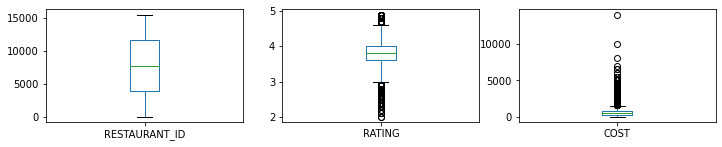

In [18]:
Train.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

In [19]:
Train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              0
VOTES            1204
COST                0
dtype: int64

In [20]:
Train['VOTES'].fillna(0,inplace = True)

In [21]:
Train.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY             112
LOCALITY          98
RATING             0
VOTES              0
COST               0
dtype: int64

In [22]:
Train.loc[~Train['VOTES'].astype(str).str.isdigit(), 'VOTES'].tolist()

['49 votes',
 '30 votes',
 '221 votes',
 '24 votes',
 '165 votes',
 '550 votes',
 '509 votes',
 '1612 votes',
 '101 votes',
 '219 votes',
 '244 votes',
 '274 votes',
 '15 votes',
 '160 votes',
 '2499 votes',
 '319 votes',
 '121 votes',
 '535 votes',
 '350 votes',
 '400 votes',
 '1327 votes',
 '1191 votes',
 '533 votes',
 '493 votes',
 '372 votes',
 '105 votes',
 '178 votes',
 '150 votes',
 '2456 votes',
 '38 votes',
 '546 votes',
 '2228 votes',
 '250 votes',
 '132 votes',
 '7 votes',
 '41 votes',
 '69 votes',
 '299 votes',
 '15 votes',
 '68 votes',
 '44 votes',
 '46 votes',
 '120 votes',
 '289 votes',
 '263 votes',
 '443 votes',
 '985 votes',
 '1824 votes',
 '518 votes',
 '12 votes',
 '236 votes',
 '739 votes',
 '34 votes',
 '66 votes',
 '31 votes',
 '20 votes',
 '219 votes',
 '145 votes',
 '196 votes',
 '18 votes',
 '593 votes',
 '87 votes',
 '69 votes',
 '1025 votes',
 '6 votes',
 '1185 votes',
 '4 votes',
 '225 votes',
 '53 votes',
 '380 votes',
 '405 votes',
 '1920 votes',
 '101 vo

In [23]:
Train['Votes'] = Train['VOTES'].str.slice(stop=2).astype(float)

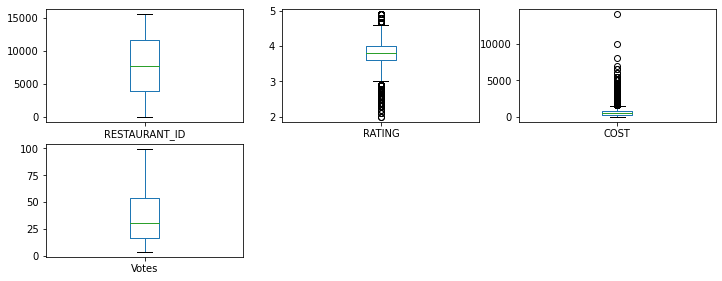

In [24]:
Train.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

In [25]:

mean_Votes = Train['Votes'].mean(skipna=True)
print(mean_Votes)

37.85121016890127


In [26]:
Train['Votes']=Train['Votes'].replace(np.nan,37.85)

In [27]:
Train.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY             112
LOCALITY          98
RATING             0
VOTES              0
COST               0
Votes              0
dtype: int64

In [28]:
Train.drop(['VOTES'],axis=1,inplace=True)

In [29]:
Train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,Votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,22.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,16.0
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,500,54.0
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1800,12.0
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,1300,60.0
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,400,32.0


In [30]:
df1 = Train[Train.isna().any(axis=1)]

In [31]:
df1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,Votes
129,None,9101,"North Indian, South Indian, Chinese, Continental","12noon – 3pm, 7pm – 2am (Mon-Sun)",NaN,NaN,3.6,500,72.0
246,QUICK BITES,14502,Biryani,12noon – 11pm (Mon-Sun),NaN,Palarivattom Kochi,3.4,300,82.0
411,None,6313,"North Indian, Chinese, Pizza, Burger, Fast Food",7pm – 4am (Mon-Sun),NaN,NaN,4.0,600,29.0
466,None,1133,North Indian,4pm – 9pm (Mon-Sun),NaN,NaN,4.2,200,55.0
481,None,4788,Street Food,"11am – 11pm (Mon),9:30am – 12midnight (Tue-Sun)",NaN,NaN,3.7,250,61.0
...,...,...,...,...,...,...,...,...,...
12280,None,3446,"North Indian, Chinese",5pm – 5am (Mon-Sun),NaN,NaN,3.7,500,28.0
12314,CASUAL DINING,11724,"North Indian, Bengali","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",NaN,Opposite to corporation bank and LIC office ba...,4.3,650,77.0
12447,QUICK BITES,7314,"North Indian, Chinese, Mughlai, Seafood",12:30pm – 12midnight (Mon-Sun),NaN,Hyderabad,3.1,350,44.0
12567,None,15532,"Biryani, Chinese, Fast Food, North Indian","11am – 1am (Mon, Sun), 11am – 12:15AM (Tue-Sat)",NaN,NaN,3.7,300,65.0


In [32]:
Train['Location']=Train['CITY']+' '+Train['LOCALITY']

In [33]:
Train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,Votes,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49.0,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30.0,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,22.0,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24.0,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,16.0,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,500,54.0,Hyderabad Gachibowli
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1800,12.0,Mumbai Bandra Kurla Complex
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,1300,60.0,Navi Mumbai Vashi
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,400,32.0,Chennai Maduravoyal


In [34]:
#replacing nan values with mode of the column because it is categorical data
Train["Location"].fillna(Train["Location"].mode()[0],inplace=True)

In [35]:
Train.drop(columns=['CITY','LOCALITY'],inplace=True)

In [36]:
Train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
RATING           0
COST             0
Votes            0
Location         0
dtype: int64

In [37]:
Train.drop(columns=['TIME'],inplace=True)

In [38]:
Train

,TITLE,RESTAURANT_ID,CUISINES,RATING,COST,Votes,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",3.6,1200,49.0,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",4.2,1500,30.0,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",3.8,800,22.0,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",4.1,800,24.0,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,3.8,300,16.0,Mumbai Lower Parel
...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab",3.8,500,54.0,Hyderabad Gachibowli
12686,"CASUAL DINING,BAR",9686,"Goan, Continental",4.3,1800,12.0,Mumbai Bandra Kurla Complex
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",4.0,1300,60.0,Navi Mumbai Vashi
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",3.5,400,32.0,Chennai Maduravoyal


In [39]:
#checking unique value for every column
Train.apply(lambda x: len(x.unique()))

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
RATING              30
COST                86
Votes               97
Location          1650
dtype: int64

In [40]:
Train.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
RATING           float64
COST               int64
Votes            float64
Location          object
dtype: object

In [101]:
Train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'RATING', 'COST', 'Votes',
       'Location'],
      dtype='object')

# Univariate Analysis

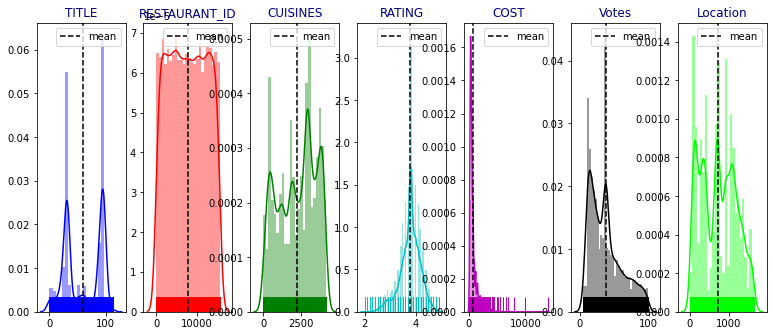

In [103]:
import itertools
cols=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'RATING', 'COST', 'Votes',
       'Location']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(15,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,8,j+1)
    ax=sns.distplot(Train[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(Train[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Multivariate Analysis

In [105]:
Train.corr()

,TITLE,RESTAURANT_ID,CUISINES,RATING,COST,Votes,Location
TITLE,1.000000,0.002487,0.244866,-0.152912,-0.263581,-0.010010,-0.005964
RESTAURANT_ID,0.002487,1.000000,0.056239,0.030937,0.040710,0.014737,0.002235
CUISINES,0.244866,0.056239,1.000000,-0.062384,-0.014078,-0.001902,0.023228
RATING,-0.152912,0.030937,-0.062384,1.000000,0.318653,0.072162,0.028076
COST,-0.263581,0.040710,-0.014078,0.318653,1.000000,0.035758,0.028376
Votes,-0.010010,0.014737,-0.001902,0.072162,0.035758,1.000000,0.010695
Location,-0.005964,0.002235,0.023228,0.028076,0.028376,0.010695,1.000000


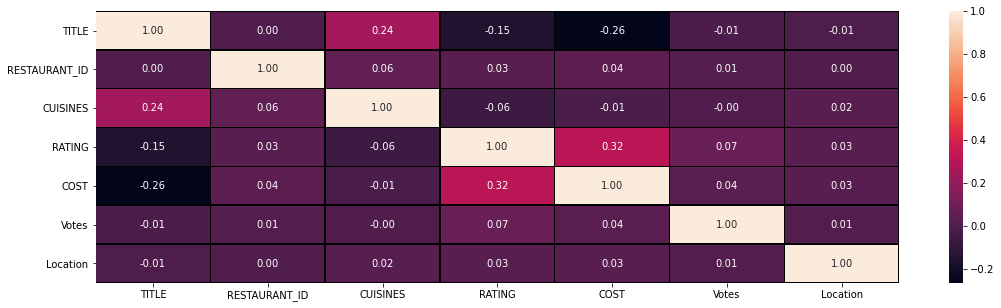

In [107]:
plt.figure(figsize=(18,5))
sns.heatmap(Train.corr(),annot=True, linewidth=0.5, linecolor="black",fmt='.2f')

In [41]:
#moving the categorical attributes
cat_col=[]
for x in Train.dtypes.index:
    if Train.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['TITLE', 'CUISINES', 'Location']

In [42]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['TITLE', 'CUISINES', 'Location']
for col in cat_col:
    Train[col] = le.fit_transform(Train[col])

In [43]:
Train

,TITLE,RESTAURANT_ID,CUISINES,RATING,COST,Votes,Location
0,31,9438,2627,3.6,1200,49.0,1587
1,33,13198,289,4.2,1500,30.0,397
2,31,10915,2976,3.8,800,22.0,402
3,95,6346,4130,4.1,800,24.0,1034
4,50,15387,1766,3.8,300,16.0,1092
...,...,...,...,...,...,...,...
12685,95,13228,2934,3.8,500,54.0,695
12686,33,9686,2143,4.3,1800,12.0,1033
12687,71,11133,2088,4.0,1300,60.0,1192
12688,31,6134,3506,3.5,400,32.0,336


In [44]:
x=Train.drop('COST',axis=1)
y=Train['COST']

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

In [46]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.metrics import r2_score
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        

print(f"Accuracy= {accu*100}found on random_state{best_rstate}")

Accuracy= 18.485528634594928found on random_state67


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=67)

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"Accuracy= {r2score*100},Cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy= 18.485528634594928,Cross_val_score=14.366951356912208 & difference =4.11857727768272


In [51]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy= {r2score*100},Cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy= 72.28763987156819,Cross_val_score=69.43175128260286 & difference =2.8558885889653283


In [52]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy= {r2score*100},Cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy= -104.70131653931301,Cross_val_score=-49.20989608505269 & difference =-55.49142045426032


In [53]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"Accuracy= {r2score*100},Cross_val_score={cvscore*100} & difference ={(r2score*100)-(cvscore*100)}")

Accuracy= -1.6599181367489178e+27,Cross_val_score=-5.467502419949305e+28 & difference =5.301510606274414e+28


# Build Random Forest Model with hyperparameters

In [54]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [55]:
#creating parameter List to pass in GridSearchCV
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [56]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(RandomForestRegressor(),param_grid,cv=5,scoring='r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)
print("Final Acccuracy:",r2_score(y_test,GCV_pred)*100)

Final Acccuracy: 57.31629272385816


In [57]:
import pickle
filename ='rest.pkl'
pickle.dump(GCV,open(filename,'wb'))

# Using the test Dataset

In [58]:
test_df=pd.read_csv(r"C:\Users\Hanish\Desktop\prop\restr.csv")
test_df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [59]:
#checking unique value for every column
test_df.apply(lambda x: len(x.unique()))

TITLE              86
RESTAURANT_ID    4127
CUISINES         1727
TIME             1183
CITY              152
LOCALITY          835
RATING             32
VOTES            1137
dtype: int64

# EDA

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

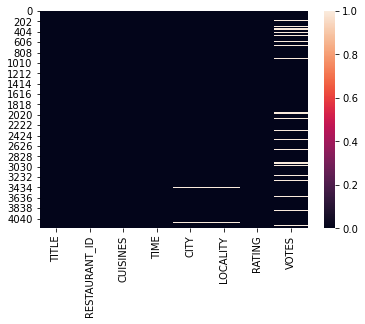

In [61]:
sns.heatmap(test_df.isnull())

In [62]:
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [63]:
test_df['RATING'] =test_df['RATING'].replace(np.nan,0)

In [71]:
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             0
VOTES            402
dtype: int64

In [72]:
is_NaN = test_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = test_df[row_has_NaN]

In [73]:
print(rows_with_NaN)

              TITLE  RESTAURANT_ID                              CUISINES  \
6     CASUAL DINING           1643  North Indian, Street Food, Fast Food   
21    CASUAL DINING           3852            North Indian, South Indian   
24      QUICK BITES           8102         Biryani, Andhra, North Indian   
27    CASUAL DINING           4696                  Continental, Italian   
29      QUICK BITES          14208                 North Indian, Chinese   
...             ...            ...                                   ...   
4183           CAFÉ           7007                    Cafe, North Indian   
4185    QUICK BITES           6387                             Fast Food   
4198    QUICK BITES          13381                           Continental   
4223  CASUAL DINING           6887                   Sindhi, Street Food   
4229    QUICK BITES           6485                      Rolls, Beverages   

                                                   TIME         CITY  \
6              

In [74]:
test_df.RATING=test_df.RATING.str.replace('[-,NEW]','0') 



In [75]:
test_df['RATING'] = test_df['RATING'].astype(float)

In [76]:
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [77]:
median_Rating = test_df['RATING'].median(skipna=True)
print(median_Rating)

3.8


In [78]:
test_df['RATING'] =test_df['RATING'].replace(np.nan,3.8)


In [79]:
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             0
VOTES            402
dtype: int64

In [80]:
test_df['VOTES'].fillna(0,inplace = True)

In [81]:
test_df['Votes'] = test_df['VOTES'].str.slice(stop=2).astype(float)

In [82]:

mean_Votes = test_df['Votes'].mean(skipna=True)
print(mean_Votes)

38.20344737529381


In [83]:
test_df['Votes']=test_df['Votes'].replace(np.nan,38.20)

In [84]:
test_df.drop(['VOTES'],axis=1,inplace=True)

In [85]:
test_df.isnull().sum()

TITLE             0
RESTAURANT_ID     0
CUISINES          0
TIME              0
CITY             35
LOCALITY         30
RATING            0
Votes             0
dtype: int64

In [86]:
test_df['Location']=test_df['CITY']+' '+test_df['LOCALITY']

In [87]:
#replacing nan values with mode of the column because it is categorical data
test_df["Location"].fillna(test_df["Location"].mode()[0],inplace=True)

In [88]:
test_df.drop(columns=['CITY','LOCALITY'],inplace=True)

In [89]:
test_df.drop(['TIME'],axis=1,inplace=True)

In [90]:
#moving the categorical attributes
cat_col=[]
for x in test_df.dtypes.index:
    if test_df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['TITLE', 'CUISINES', 'Location']

In [91]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['TITLE', 'CUISINES', 'Location']
for col in cat_col:
    test_df[col] = le.fit_transform(test_df[col])

In [92]:
test_df

,TITLE,RESTAURANT_ID,CUISINES,RATING,Votes,Location
0,23,4085,1293,4.3,56.0,833
1,75,12680,1632,4.2,61.0,598
2,23,1411,1455,3.8,35.0,617
3,66,204,208,3.8,14.0,279
4,75,13453,1637,3.6,23.0,506
...,...,...,...,...,...,...
4226,23,9057,1425,3.9,28.0,787
4227,66,1247,267,4.3,46.0,43
4228,75,8617,679,3.7,53.0,289
4229,75,6485,1541,0.0,38.2,507


In [93]:
fitted_model=pickle.load(open("rest.pkl","rb"))

In [94]:
fitted_model

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             scoring='r2')

In [95]:
predictions=fitted_model.predict(test_df)

In [96]:
predictions

array([ 982.95951437, 1432.47017652,  637.69817643, ..., 1432.47017652,
       1432.47017652, 1432.47017652])

In [97]:
print(predictions)

[ 982.95951437 1432.47017652  637.69817643 ... 1432.47017652 1432.47017652
 1432.47017652]


In [98]:
dfpd = pd.DataFrame(predictions, columns = ['ouput'])

In [99]:
#checking unique value for every column
dfpd.apply(lambda x: len(x.unique()))

ouput    22
dtype: int64

In [100]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfpd)

            ouput
0      982.959514
1     1432.470177
2      637.698176
3      362.776823
4     1432.470177
5      335.532178
6      637.698176
7      880.894843
8      362.776823
9      637.698176
10     637.698176
11    1432.470177
12     982.959514
13     334.864648
14     982.959514
15     637.698176
16    1432.470177
17     362.776823
18    1432.470177
19     637.698176
20     637.698176
21     637.698176
22     637.698176
23    1432.470177
24    1432.470177
25     982.959514
26     982.959514
27     637.698176
28     637.698176
29    1432.470177
30    1432.470177
31     362.776823
32     880.894843
33     880.894843
34     637.698176
35     637.698176
36     982.959514
37    1432.470177
38     880.894843
39     880.894843
40     637.698176
41     982.959514
42    1432.470177
43     637.698176
44     362.776823
45    1432.470177
46    1432.470177
47    1432.470177
48     335.532178
49     637.698176
50     637.698176
51    1432.470177
52     637.698176
53    1432.470177
54     982